In [6]:
import numpy as np
import math
import os
import random
import matplotlib.pyplot as plt

# TWO LAYERS

def sigmoid(x):
    return 1/(1 + math.exp(-x))

#calculate weights correction in backpropagation
def calculateDeltaWeights(weights, inPut, y, error):
    deltaWeights = np.zeros(weights.shape)
    for i, l in zip(range(inPut.size), inPut):
        for j, y_ in zip(range(y.size), y):
            deltaWeights[i, j] = 0.01*error[j]*(1-y_)*y_*l # czy tu ma być minus we wzorze?
    return deltaWeights

# calculate an error for a layer in backpropagation
def calculateLayerErrors(weights, layer, y, error):
    layerErrors = np.zeros(layer.shape)
    for i, l in zip(range(layer.size), layer):
        for j, y_ in zip(range(y.size), y):
            layerErrors[i] += error[j]*(1-y_)*y_*weights[i, j]
    return layerErrors

class neuralNetwork:
    def __init__(self, inPut, outPut):
        self.inPut      = inPut #input data
        self.weights1   = 0.1*np.ones((inPut.size,5))
        self.weights2   = 0.1*np.ones((5, 4)) 
        self.weights3   = 0.1*np.ones((4, outPut.size))
        self.outPut     = outPut #desired output
        self.y          = np.zeros(outPut.size) #calculated output
        self.loss       = [] # average loss after each iteration
    
    def setInPut(self, inPut):
        self.inPut = inPut

    def setOutPut(self, outPut):
        self.outPut = outPut
        
    def feedforward(self):
        func = np.vectorize(sigmoid)
        self.layer1 = func(np.dot(self.inPut, self.weights1))
        self.layer2 = func(np.dot(self.layer1, self.weights2))
        self.y = func(np.dot(self.layer2, self.weights3))
    
    def backpropagation(self):
        delta = self.outPut - self.y
        self.loss.append(math.fabs(sum(delta)/3))
        
        # calculate correction for weights3 (between output and layer2)
        deltaWeights3 = calculateDeltaWeights(self.weights3, self.layer2, self.y, delta)
        self.weights3 += deltaWeights3
        # calculate errors for layer2
        layer2Errors = calculateLayerErrors(self.weights3, self.layer2, self.y, delta)
        
        # calculate correction for weights2 (between layer2 and layer1)
        deltaWeights2 = calculateDeltaWeights(self.weights2, self.layer1, self.layer2, layer2Errors)
        self.weights2 += deltaWeights2
        # calculate errors for layer1
        layer1Errors = calculateLayerErrors(self.weights2, self.layer1, self.layer2, layer2Errors)

        # calculate correction for weights1 (between layer1 and input)
        deltaWeights1 = calculateDeltaWeights(self.weights1, self.inPut, self.layer1, layer1Errors)
        self.weights1 += deltaWeights1

0
10
20
30
40


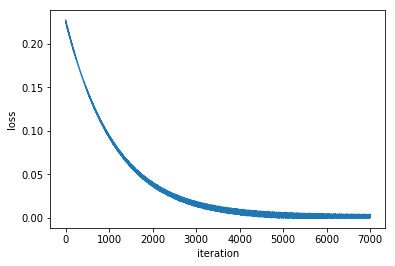

In [8]:
filename = 'iris.txt'
if os.path.isfile(filename):
    f = open(filename, "r")
    data = np.asarray([line.split() for line in f], dtype = float)
    np.random.shuffle(data)
    train = data[:140]
    test = data[140:]
    inPutData = np.asarray([row[:4] for row in train], dtype = float)
    outPutData = np.asarray([row[4:] for row in train], dtype = float)
    inPutTest = np.asarray([row[:4] for row in test], dtype = float)
    outPutTest = np.asarray([row[4:] for row in test], dtype = float)
    f.close() 

# initialize net
net = neuralNetwork(inPutData[0], outPutData[0])
# learning
for i in range(100):
    if i%10==0: print(i)
    for inp, outp in zip(inPutData, outPutData):
        net.setInPut(inp)
        net.setOutPut(outp)
        net.feedforward()
        net.backpropagation()
# show loss
plt.plot(net.loss)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

In [9]:
# test results
for inp, outp in zip(inPutTest, outPutTest):
    net.setInPut(inp)
    net.setOutPut(outp)
    net.feedforward()
    #print('net.inPut')
    #print(net.inPut)
    print('net.outPut')
    print(net.outPut)
    print('net.y')
    print(net.y)
    print('')

net.outPut
[1. 0. 0.]
net.y
[0.31344516 0.35182674 0.34083139]

net.outPut
[1. 0. 0.]
net.y
[0.31376552 0.35209127 0.34111273]

net.outPut
[0. 0. 1.]
net.y
[0.30892478 0.34808806 0.33685687]

net.outPut
[1. 0. 0.]
net.y
[0.31505399 0.35315464 0.34224381]

net.outPut
[1. 0. 0.]
net.y
[0.31409849 0.35236615 0.34140509]

net.outPut
[1. 0. 0.]
net.y
[0.3148746  0.35300664 0.34208637]

net.outPut
[0. 1. 0.]
net.y
[0.31137397 0.35011512 0.33901142]

net.outPut
[0. 0. 1.]
net.y
[0.31030614 0.34923174 0.33807237]

net.outPut
[0. 0. 1.]
net.y
[0.3089923  0.34814399 0.33691631]

net.outPut
[1. 0. 0.]
net.y
[0.31453062 0.35272282 0.34178446]

